In [1]:
import pandas as pd
import numpy as np

# Memuat dataset dari URL
url = 'https://raw.githubusercontent.com/Treamyracle/AITF/refs/heads/main/%231%20Data%20Scraping/student_exam_scores.csv'
df = pd.read_csv(url)

# Mengisi nilai yang hilang pada 'previous_scores' dengan median
median_previous_scores = df['previous_scores'].median()
df['previous_scores'].fillna(median_previous_scores, inplace=True)

# Menghapus kolom ID yang tidak relevan untuk pemodelan
df_model = df.drop('student_id', axis=1)

print("Data siap untuk analisis korelasi dan pemodelan.")
print(df_model.head())

Data siap untuk analisis korelasi dan pemodelan.
   hours_studied  sleep_hours  attendance_percent  previous_scores  exam_score
0            8.0          8.8                72.1               45        30.2
1            1.3          8.6                60.7               55        25.0
2            4.0          8.2                73.7               86        35.8
3            3.5          4.8                95.1               66        34.0
4            9.1          6.4                89.8               71        40.3


C:\Users\tream\AppData\Local\Temp\ipykernel_19288\3154193313.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_scores'].fillna(median_previous_scores, inplace=True)


In [3]:
df_model 

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


C:\Users\tream\AppData\Local\Temp\ipykernel_19288\3410126717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


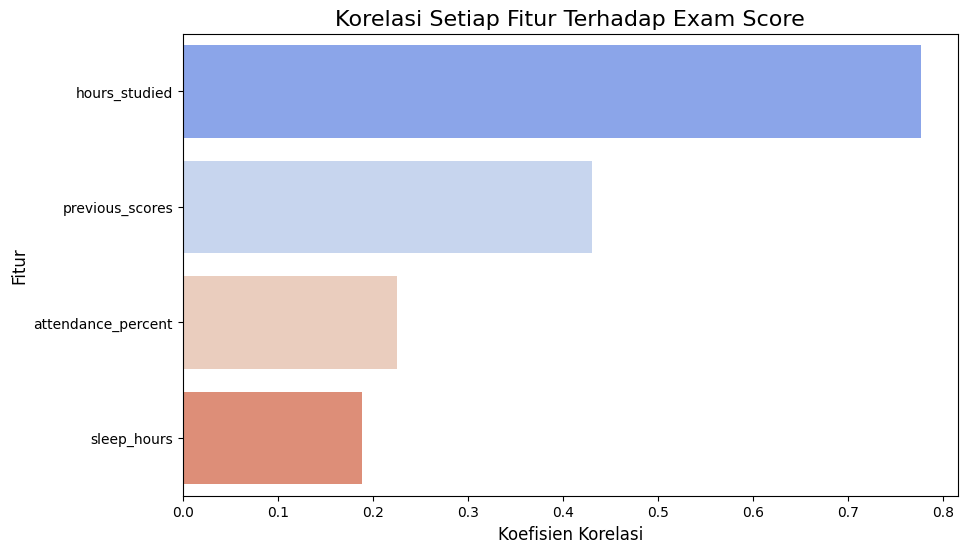

hours_studied         0.776751
previous_scores       0.431105
attendance_percent    0.225713
sleep_hours           0.188222
Name: exam_score, dtype: float64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung matriks korelasi
corr_matrix = df_model.corr()

# Mengambil korelasi setiap fitur terhadap 'exam_score'
corr_target = corr_matrix['exam_score'].drop('exam_score').sort_values(ascending=False)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Korelasi Setiap Fitur Terhadap Exam Score', fontsize=16)
plt.xlabel('Koefisien Korelasi', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

print(corr_target)

In [4]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df_model.drop('exam_score', axis=1)
y = df_model['exam_score']

# Melakukan pembagian data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data training (X_train): {X_train.shape}")
print(f"Ukuran data testing (X_test):  {X_test.shape}")

Ukuran data training (X_train): (160, 4)
Ukuran data testing (X_test):  (40, 4)


In [5]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Mendefinisikan model-model yang akan diuji
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}

# Looping untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Membuat pipeline yang menggabungkan scaling dan model
    # Scaling penting untuk model linear, dan tidak berbahaya untuk model tree-based
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Melatih pipeline
    pipeline.fit(X_train, y_train)
    
    # Membuat prediksi
    y_pred = pipeline.predict(X_test)
    
    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Menyimpan hasil
    results[name] = [mae, rmse, r2]
    print(f"Hasil untuk {name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.4f}")

# Mengubah hasil menjadi DataFrame untuk perbandingan yang mudah
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R-squared']).T

Hasil untuk Linear Regression: MAE=2.31, RMSE=2.79, R2=0.8537
Hasil untuk Ridge Regression: MAE=2.31, RMSE=2.79, R2=0.8538
Hasil untuk Random Forest: MAE=2.95, RMSE=3.30, R2=0.7944
Hasil untuk Gradient Boosting: MAE=2.92, RMSE=3.44, R2=0.7769


In [6]:
# Menampilkan tabel hasil perbandingan
print("\n--- Perbandingan Performa Model ---")
print(results_df.sort_values(by='RMSE', ascending=True))


--- Perbandingan Performa Model ---
                        MAE      RMSE  R-squared
Ridge Regression   2.312413  2.785791   0.853766
Linear Regression  2.310858  2.785998   0.853745
Random Forest      2.951225  3.303606   0.794351
Gradient Boosting  2.915163  3.440562   0.776947
